# SMS - Spam Detection
Identifying spam messages from various sms

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [129]:
#df = pd.read_table('SMSSpamCollection',
#df.head(6)

data = pd.read_csv('SMSSpamCollection', sep='\t',names=['Type','Message'])
data.head(6)

#pd.get_dummies(data['Type'])

#data.head(6)

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [130]:
# Split the data into Train & Test
X_train_raw, X_test_raw, y_train,y_test = train_test_split(data['Message'],data['Type'])

In [131]:
# Vectorize the data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)

X_test = vectorizer.transform(X_test_raw)

In [132]:
X_train.shape

(4179, 7505)

In [133]:
X_test.shape

(1393, 7505)

In [134]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

classifier.classes_


array(['ham', 'spam'], dtype=object)

In [135]:
predictions = classifier.predict_proba(X_test)

predictions

# Interpretation of 'prediction' result - ex [ 0.93939494,  0.06060506]
# Reference -  classifier.classes_ GIVES ['ham','spam']
# 93% probability this is a "ham" sms. 6% probability this is a "spam" sms.

array([[ 0.96095883,  0.03904117],
       [ 0.97658212,  0.02341788],
       [ 0.98332911,  0.01667089],
       ..., 
       [ 0.86561977,  0.13438023],
       [ 0.25251322,  0.74748678],
       [ 0.97120773,  0.02879227]])

In [136]:
predictions[:, 1]

array([ 0.03904117,  0.02341788,  0.01667089, ...,  0.13438023,
        0.74748678,  0.02879227])

In [137]:
X_test_raw.tail(6)

2277                         Love you aathi..love u lot..
2709                              Nah, I'm a perpetual DD
4919    Sitting in mu waiting for everyone to get out ...
450                                     10 min later k...
738     Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
2280                    Sorry, I'll call later in meeting
Name: Message, dtype: object

In [138]:
# Note we are checking for 'spam' detection

false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1],pos_label='spam')

# If we would have looked for "ham" detection , we would have framed as below

# false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[1,:] ,pos_label='ham')
print false_positive_rate
print recall
print thresholds

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   8.27814570e-04   8.27814570e-04
   8.27814570e-04   8.27814570e-04   8.27814570e-04   8.27814570e-04
   8.27814570e-04   8.27814570e-04   8.27814570e-04   8.27814570e-04
   8.27814570e-04   8.27814570e-04   8.27814570e-04   8.27814570e-04
   1.65562914e-03   1.65562914e-03   1.65562914e-03   3.31125828e-03
   3.31125828e-03   5.79470199e-03   5.79470199e-03   6.62251656e-03
   6.62251656e-03   7.45033113e-03   7.45033113e-03   9.93377483e-03
   9.93377483e-03   1.15894040e-02   1.32450331e-02   1.40728477e-02
   1.40728477e-02   1.57284768e-02   1.57284768e-02   1.65562914e-02
   1.65562914e-02   1.82119205e-02   1.82119205e-02   2.31788079e-02
   2.48344371e-02   2.64900662e-02   2.64900662e-02   3.47682119e-02
   3.47682119e-02   4.47019868e-02   4.63576159e-02   1.05132450e-01
   1.08443709e-01   1.10927152e-01

In [139]:
roc_auc = auc(false_positive_rate, recall)

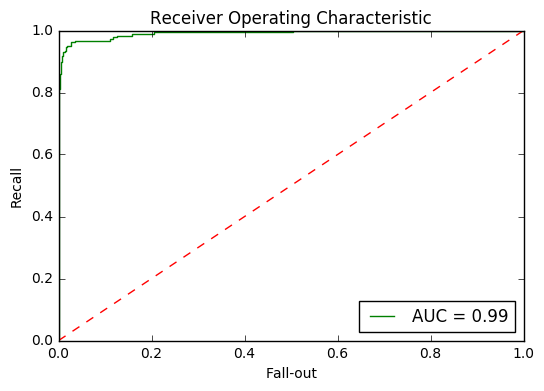

In [140]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'g', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()